# CASA 0006 Data Science for Spatial Systems Final Assessment
# ID: 17060078


# Research Question:
# Is it possible to predict a customer's churn based on the information held by their telecom providers?



<a id='intro_cell'></a>
### Introduction

Berson et al defined the term "customer churn" as the customer's movement from one provider to another in the wireless telecom service industry. With an increasing trend of emerging providers in the telecommunication industry, the companies tend to keeping their existing clients rather than attracting new clients constantly for more long term profit(D. V. Poel and B. Larivi). Therefore, investigating the reasons to and measures to reduce churn is key to the survival of many telecom organisations. This analysis focuses on the former. It illustrates the relationship of the services provided to the customers and whether they churned. 

Specifically, it uses a series of binary classification techniques including K Nearest Neighbours, Decision Trees, Random Forest and Support Vector Machine. It finds a best model of predictive churn to reduce the customers turnover, enhancing its competitive edge.

The rest of this analysis is structured as follows:
Data will be cleaned and exploratory data analysis (overview) will be conducted, this is followed by applying four classification techniques and comparing their performance.


[Introduction](#another_cell)|
[Data preprocessing--Overview](#data_pre_over)|
[EDA visualisation section 1](#eda1)|
[Data cleaning](#data_cleaning)|
[Processing independent and dependent variables](#xandy)|
[EDA visualisation section 2](#eda2)|
[splitting into training and testing set](#testandtrain)|
[Classification1--KNN](#knn)|
[Classification2--KNN](#dt)|
[Classification3--KNN](#rf)|
[Classification4--KNN](#svm)|
[Comparison between models](#compare)|
[Conclusion](#conclude)|
[Bibliography](#bib)|

<a id='data_pre_over'></a>
### Data preprocessing
#### Overview

This dataset is originally from a telecommunications company, which was sourced from Kaggle. It contains information about the customers' demographic characteristics and the services they use, etc. 

The metadata is listed below:

|Column Name | Description | Data Type|
|:--:|:--:|:--:|
|customerID | customer id| integer (numerical) |
|gender | client gender (male / female) | boolean (categorical)|
|SeniorCitizen | is the client retired (1, 0) |boolean (categorical)|
|Partner | is the client married (Yes, No)|boolean (categorical)|
|tenure| how many months a person has been a client of the company|integer (numerical) |
|PhoneService | is the telephone service connected (Yes, No)|boolean (categorical)|
|MultipleLines | are multiple phone lines connected (Yes, No, No phone service)|categorical|
|InternetService | client's Internet service provider (DSL, Fiber optic, No)|categorical|
|OnlineSecurity | is the online security service connected (Yes, No, No internet service)|categorical|
|OnlineBackup | is the online backup service activated (Yes, No, No internet service)|categorical|
|DeviceProtection | does the client have equipment insurance (Yes, No, No internet service)|categorical|
|TechSupport | is the technical support service connected (Yes, No, No internet service)|categorical|
|StreamingTV | is the streaming TV service connected (Yes, No, No internet service)|categorical|
|StreamingMovies | is the streaming cinema service activated (Yes, No, No internet service)|categorical|
|Contract | type of customer contract (Month-to-month, One year, Two year)|categorical|
|PaperlessBilling | whether the client uses paperless billing (Yes, No)|boolean (categorical)|
|PaymentMethod | payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|categorical|
|MonthlyCharges | current monthly payment | float (numerical) |
|TotalCharges | the total amount that the client paid for the services for the entire time | float (numerical) |
|Churn| whether there was a churn (Yes or No)|boolean (categorical)|

In [1]:
#data preprocessing packages
import pandas as pd
import seaborn as sns # for easier plotting
import matplotlib.pyplot as plt # for plotting
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

# classification packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Tiana125/assessment_dsss2021/main/telecom_users.csv",
                  low_memory = False)

In [3]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


(5986, 22)

|Types of data|Number of data columns|
|:--:|:--:|
|Boolean|5|
|Numerical|4|
|Categorical (excluding Boolean)|13|

Dimensions/ shape: (5986, 22)

[Introduction](#another_cell)|
[Data preprocessing--Overview](#data_pre_over)|
[EDA visualisation section 1](#eda1)|
[Data cleaning](#data_cleaning)|
[Processing independent and dependent variables](#xandy)|
[EDA visualisation section 2](#eda2)|
[splitting into training and testing set](#testandtrain)|
[Classification1--KNN](#knn)|
[Classification2--KNN](#dt)|
[Classification3--KNN](#rf)|
[Classification4--KNN](#svm)|
[Comparison between models](#compare)|
[Conclusion](#conclude)|
[Bibliography](#bib)|

<a id='eda1'></a>
#### Some EDA on original data

<AxesSubplot:xlabel='Dependents', ylabel='count'>

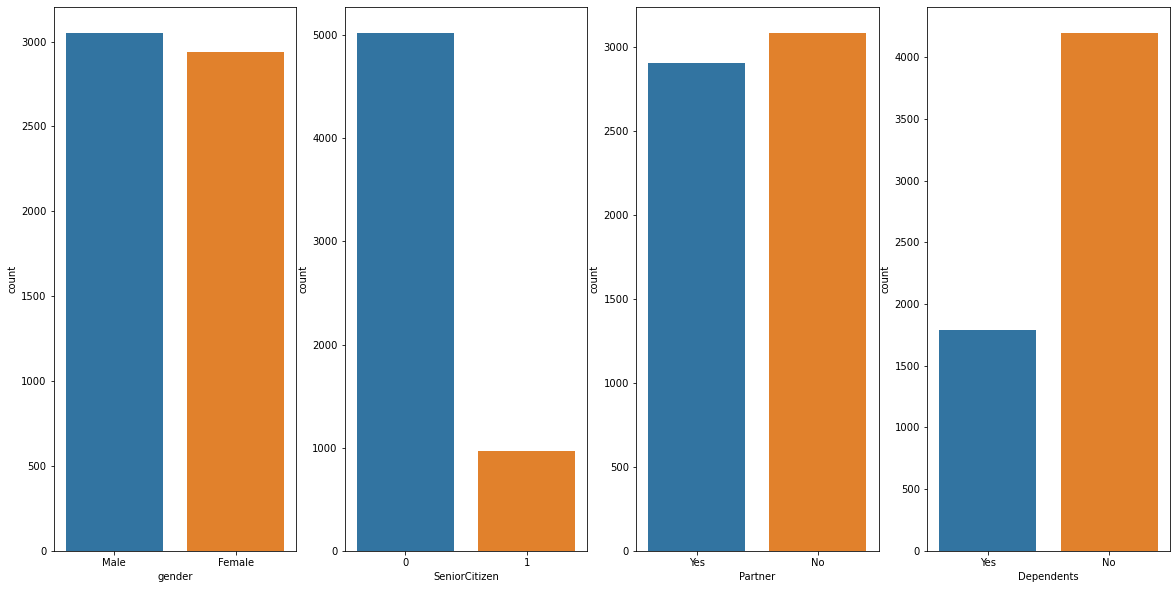

In [4]:

fig, axes = plt.subplots(ncols = 4, figsize=(20,10))

sns.countplot(x=data["gender"], ax=axes[0])
sns.countplot(x=data["SeniorCitizen"], ax=axes[1])
sns.countplot(x=data["Partner"], ax=axes[2])
sns.countplot(x=data["Dependents"], ax=axes[3])

__Demographic of users__

- The genders of users and whether they have partners are roughly evenly distributed.
- Less than 20% of users are senior citizens. 
- More users do not have dependents. 

<AxesSubplot:xlabel='tenure', ylabel='Count'>

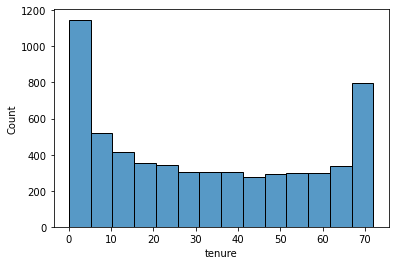

In [5]:
sns.histplot(x="tenure",data=data,kde=False)

There are more users who have been using the services for over 70 months and even more new users.

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

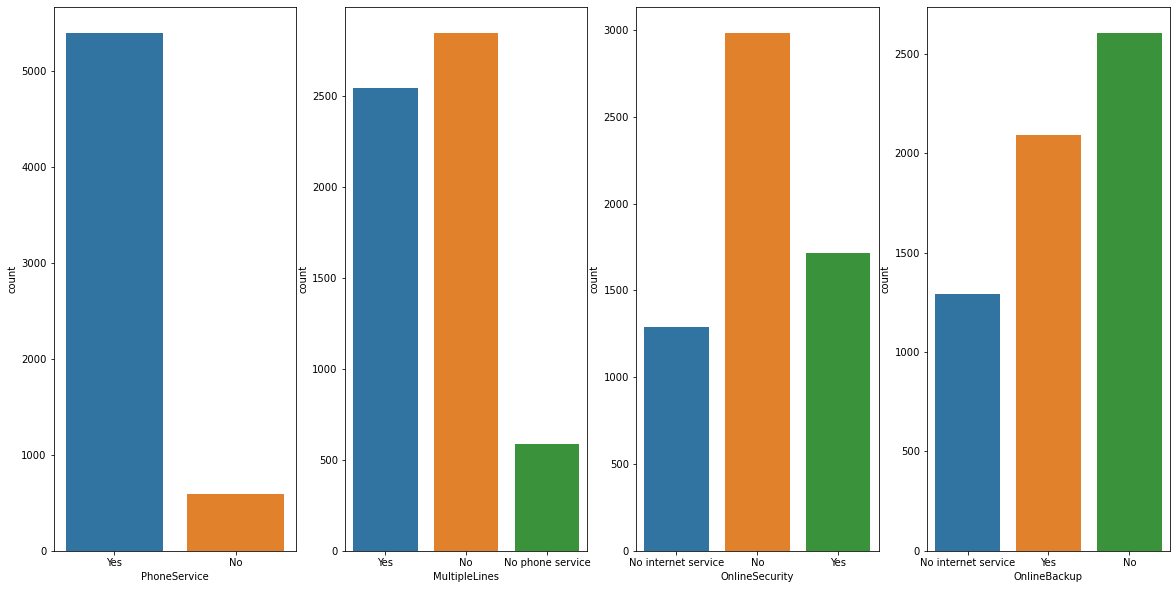

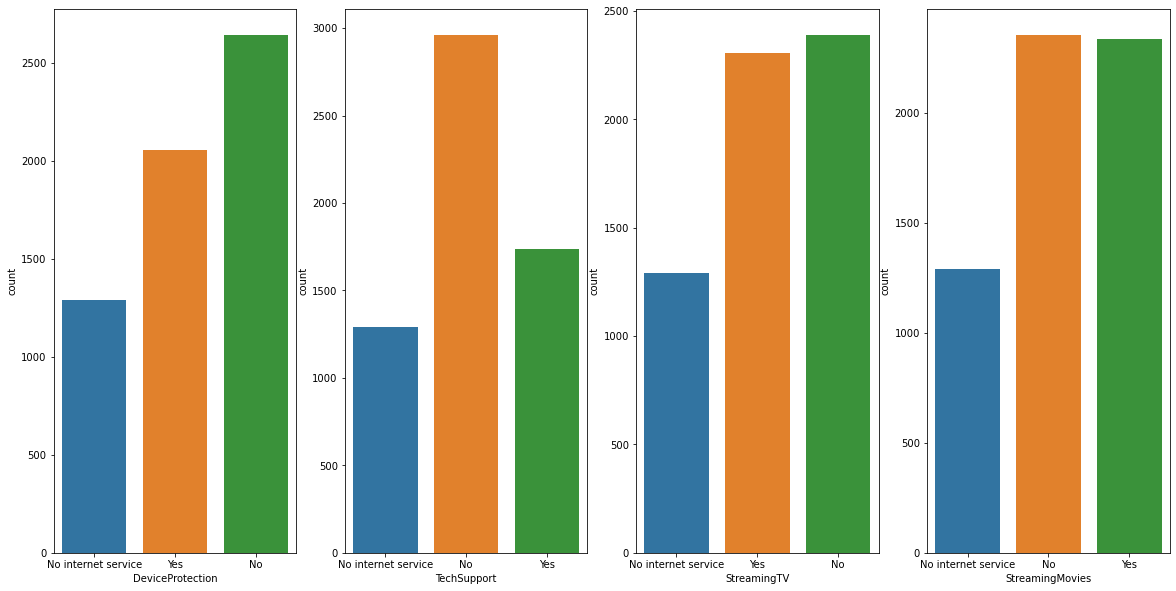

In [6]:
fig, axes = plt.subplots(ncols = 4, figsize=(20,10))

sns.countplot(x=data["PhoneService"], ax=axes[0])
sns.countplot(x=data["MultipleLines"], ax=axes[1])
sns.countplot(x=data["OnlineSecurity"], ax=axes[2])
sns.countplot(x=data["OnlineBackup"], ax=axes[3])

fig, axes = plt.subplots(ncols = 4, figsize=(20,10))

sns.countplot(x=data["DeviceProtection"], ax=axes[0])
sns.countplot(x=data["TechSupport"], ax=axes[1])
sns.countplot(x=data["StreamingTV"], ax=axes[2])
sns.countplot(x=data["StreamingMovies"], ax=axes[3])


__Services of users__

- The most popular service is phone service, over 90% users use this service.
- The second most popular service is multiple lines.

- Some services, including online backup, device protection, streaming TV and movies have small discrepancy between the number of users and non-users.  

[Introduction](#another_cell)|
[Data preprocessing--Overview](#data_pre_over)|
[EDA visualisation section 1](#eda1)|
[Data cleaning](#data_cleaning)|
[Processing independent and dependent variables](#xandy)|
[EDA visualisation section 2](#eda2)|
[splitting into training and testing set](#testandtrain)|
[Classification1--KNN](#knn)|
[Classification2--KNN](#dt)|
[Classification3--KNN](#rf)|
[Classification4--KNN](#svm)|
[Comparison between models](#compare)|
[Conclusion](#conclude)|
[Bibliography](#bib)|

<a id='data_cleaning'></a>
#### Removing unnecessary columns
After an overview of the data, the columns are consistent with the metadata. Some unnecessary columns are removed. 

In [7]:
# drop columns that are irreleant to analysis
data = data.drop(["Unnamed: 0", "customerID"], axis = 1)

#### Identifying missing, empty or incorrect values

There are no missing value in the data as the number of entries are the same throughout all columns. However, the possibility of empty value cannot be ruled out. Additionally, categorical and numerical data requires different treatment and identification techiques. 


In [8]:
# separating the different types of columns
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn']
numerical_columns = ['TotalCharges','MonthlyCharges','tenure']


In [9]:
# listing the unique values of categorical data columns
for i in data[categorical_columns].columns:
    print('Column name:',i)
    print('Unique values:',data[i].unique())
    print('\n ')

Column name: gender
Unique values: ['Male' 'Female']

 
Column name: SeniorCitizen
Unique values: [0 1]

 
Column name: Partner
Unique values: ['Yes' 'No']

 
Column name: Dependents
Unique values: ['Yes' 'No']

 
Column name: PhoneService
Unique values: ['Yes' 'No']

 
Column name: MultipleLines
Unique values: ['Yes' 'No' 'No phone service']

 
Column name: InternetService
Unique values: ['No' 'Fiber optic' 'DSL']

 
Column name: OnlineSecurity
Unique values: ['No internet service' 'No' 'Yes']

 
Column name: OnlineBackup
Unique values: ['No internet service' 'Yes' 'No']

 
Column name: DeviceProtection
Unique values: ['No internet service' 'Yes' 'No']

 
Column name: TechSupport
Unique values: ['No internet service' 'No' 'Yes']

 
Column name: StreamingTV
Unique values: ['No internet service' 'Yes' 'No']

 
Column name: StreamingMovies
Unique values: ['No internet service' 'No' 'Yes']

 
Column name: Contract
Unique values: ['Two year' 'Month-to-month' 'One year']

 
Column name: Pap

In [10]:
# listing the maximum and minimum values of numerical data columns
for i in data[numerical_columns].columns:
    print('Column name:',i)
    print('max values:',data[i].max())
    print('Min values:',data[i].min())
    print('\n ')

Column name: TotalCharges
max values: 999.9
Min values:  

 
Column name: MonthlyCharges
max values: 118.75
Min values: 18.25

 
Column name: tenure
max values: 72
Min values: 0

 


Empty data is identified in the numerical "TotalCharges" column, the whole row is removed if there is an empty entry. In addition, in the `data.info()` output, the data type of "TotalCharges" is not consistent with the metadata, this will also be corrected. 

In [11]:
# remove rows with empty space and see difference

data = data[data.TotalCharges != " "]
data.TotalCharges = data.TotalCharges.astype(float)
data.shape

(5976, 20)

Ten rows were removed, which is not a significant amount compared to the whole dataset.

[Introduction](#another_cell)|
[Data preprocessing--Overview](#data_pre_over)|
[EDA visualisation section 1](#eda1)|
[Data cleaning](#data_cleaning)|
[Processing independent and dependent variables](#xandy)|
[EDA visualisation section 2](#eda2)|
[splitting into training and testing set](#testandtrain)|
[Classification1--KNN](#knn)|
[Classification2--KNN](#dt)|
[Classification3--KNN](#rf)|
[Classification4--KNN](#svm)|
[Comparison between models](#compare)|
[Conclusion](#conclude)|
[Bibliography](#bib)|

<a id='xandy'></a>
#### Separating dependent and independent variables

In [12]:
churn = data.Churn
data = data.drop("Churn", axis = 1)

In addition to separating the variables, categorical values need to be treated (transformed to numerical data). 

For the response variable, `LabelEncoder` is used rather than `pandas.get_dummies` because it conserves space and the order of integers do not have to be meaningful as churn only has two outputs (unlike regression problems where the order of integers implies incremental influence). 

For the independent variables, `DictVectorizer` is used to convert feature arrays represented as lists of  dictionaries. Specifically, the flag “record” is used in `to_dict` for converting them to arrays of dictionaries, where one dictionary corresponds to one data entry. This is essential because to obtain a list of feature names ordered by their indices as well as converting categorical values to numericals, an array of dictionaries(feature-value mappings) must be fed to`DictVectorizer`.

In [13]:
le = LabelEncoder() # creates the LabelEncoder object
le.fit(['No', 'Yes']) # explicitly encode 'Yes' and  'No' with 1 and 0, respectively
label_y = le.transform(churn) # runs LabelEncoder on the churn column

In [14]:
data_dict = data.to_dict('records')

vec = DictVectorizer()  # create the DictVectorizer object
vec_array = vec.fit_transform(data_dict).toarray()  
# execute process on the record dictionaries and transform the result into a numpy array objec

vec.get_feature_names()

['Contract=Month-to-month',
 'Contract=One year',
 'Contract=Two year',
 'Dependents=No',
 'Dependents=Yes',
 'DeviceProtection=No',
 'DeviceProtection=No internet service',
 'DeviceProtection=Yes',
 'InternetService=DSL',
 'InternetService=Fiber optic',
 'InternetService=No',
 'MonthlyCharges',
 'MultipleLines=No',
 'MultipleLines=No phone service',
 'MultipleLines=Yes',
 'OnlineBackup=No',
 'OnlineBackup=No internet service',
 'OnlineBackup=Yes',
 'OnlineSecurity=No',
 'OnlineSecurity=No internet service',
 'OnlineSecurity=Yes',
 'PaperlessBilling=No',
 'PaperlessBilling=Yes',
 'Partner=No',
 'Partner=Yes',
 'PaymentMethod=Bank transfer (automatic)',
 'PaymentMethod=Credit card (automatic)',
 'PaymentMethod=Electronic check',
 'PaymentMethod=Mailed check',
 'PhoneService=No',
 'PhoneService=Yes',
 'SeniorCitizen',
 'StreamingMovies=No',
 'StreamingMovies=No internet service',
 'StreamingMovies=Yes',
 'StreamingTV=No',
 'StreamingTV=No internet service',
 'StreamingTV=Yes',
 'TechSupp

[Introduction](#another_cell)|
[Data preprocessing--Overview](#data_pre_over)|
[EDA visualisation section 1](#eda1)|
[Data cleaning](#data_cleaning)|
[Processing independent and dependent variables](#xandy)|
[EDA visualisation section 2](#eda2)|
[splitting into training and testing set](#testandtrain)|
[Classification1--KNN](#knn)|
[Classification2--KNN](#dt)|
[Classification3--KNN](#rf)|
[Classification4--KNN](#svm)|
[Comparison between models](#compare)|
[Conclusion](#conclude)|
[Bibliography](#bib)|

<a id='eda2'></a>
#### Some EDA on cleaned numerical data

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

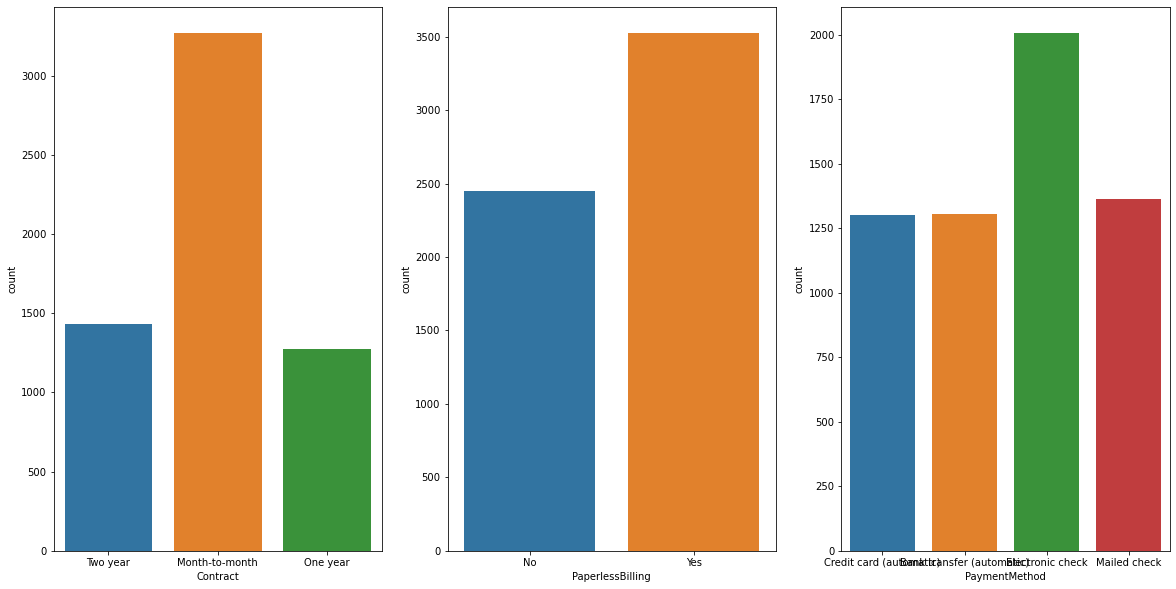

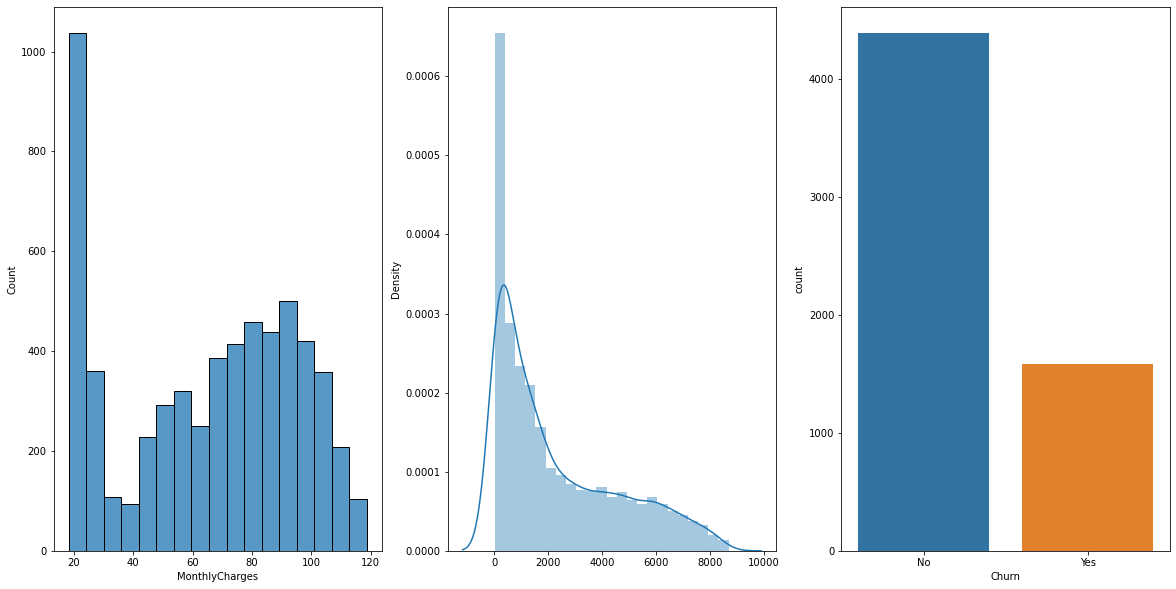

In [15]:

fig, axes = plt.subplots(ncols = 3, figsize=(20,10))

sns.countplot(x=data["Contract"], ax=axes[0])
sns.countplot(x=data["PaymentMethod"], ax=axes[2])
sns.countplot(x=data["PaperlessBilling"], ax=axes[1])

fig, axes = plt.subplots(ncols = 3, figsize=(20,10))

sns.histplot(x=data["MonthlyCharges"], ax=axes[0])
sns.countplot(x=churn, ax=axes[2])
sns.distplot(x=data["TotalCharges"], ax=axes[1])


__Monetary choices__

- About half of the users use monthly contracts and the rest of them are in long-term contracts. 
- More people use paperless billings.
- In monthly charges plot (bottom left), 30% users are light users who pay only $20 each month whereas another high blob of users are charged $100. 
- Most users are new users, seen in the TotalCharges plot (bottom mid). This suggests there is a healthy amount of new users coming in. 
- Most users do not churn. About 20% users churn. 

[Introduction](#another_cell)|
[Data preprocessing--Overview](#data_pre_over)|
[EDA visualisation section 1](#eda1)|
[Data cleaning](#data_cleaning)|
[Processing independent and dependent variables](#xandy)|
[EDA visualisation section 2](#eda2)|
[splitting into training and testing set](#testandtrain)|
[Classification1--KNN](#knn)|
[Classification2--KNN](#dt)|
[Classification3--KNN](#rf)|
[Classification4--KNN](#svm)|
[Comparison between models](#compare)|
[Conclusion](#conclude)|
[Bibliography](#bib)|

<a id='testandtrain'></a>
#### splitting into training and testing set

In [16]:
train_d, test_d, train_lab, test_lab = train_test_split(vec_array, churn)
len(train_d),len(test_d),len(train_lab),len(test_lab)

(4482, 1494, 4482, 1494)

The training and testing split is a 75/25 ratio. 

### Data Analytics

It is a binary classification problem to predict the customer churn using a series of attributes. In this analysis, four classification methods are used:

- k-Nearest Neighbour
- Decision Tree
- Random Forest 
- Support Vector Machine
<a id='knn'></a>
#### k-Nearest Neighbour Classification
A simple method which classifies data points based on their proximity. 

In [17]:
# parameter tuning for knn
knn_k = [10,50,60,70,100,150,200,500,1000]
knn_acc=[]
for i in knn_k:
    knn = KNeighborsClassifier(n_neighbors=i)  # creates the kNN classifier, setting it to check the selected neighbouring points
    knn.fit(train_d, train_lab)  # executes the classifier on the training dataset
    knn_acc.append(knn.score(test_d, test_lab) )

Text(0, 0.5, 'accuracy')

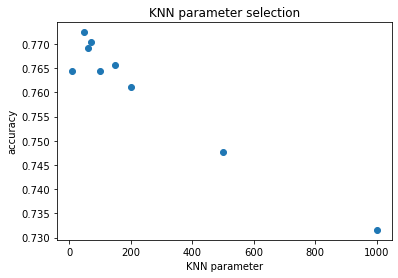

In [18]:
# results(knn accuracies) are generated from the output of the above code cell,
# this may be different across different runs

plt.scatter(knn_k, knn_acc)
plt.title("KNN parameter selection")
plt.xlabel("KNN parameter")
plt.ylabel("accuracy")

The accuracy of KNN is around 76%. One should look for a k value that maximises the accuracy without being too small. A tiny k value would result in over-fitting to each small cluster, which would often lead to a low performance. Thus the knn's parameter is selected to be 100 and its accuracy is about 76.3%.

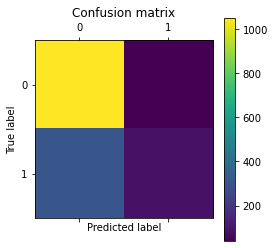

In [19]:
# Now the selected k is used to classify data. 
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(train_d, train_lab)
predictions = knn.predict(test_d) # make predictions
confusion_matrix = metrics.confusion_matrix(test_lab, predictions) # fit confusion matrix
plt.matshow(confusion_matrix) #show confusion matrix
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [20]:
print("KNN Classification results: ")
print(metrics.classification_report(test_lab, predictions))

KNN Classification results: 
              precision    recall  f1-score   support

          No       0.77      0.96      0.86      1093
         Yes       0.69      0.22      0.34       401

    accuracy                           0.76      1494
   macro avg       0.73      0.59      0.60      1494
weighted avg       0.75      0.76      0.72      1494



__Performance__

The overall accuracy(regardless of classes) is well, however, the recall of "Yes" is only 0.24, meaning only 24% of customer churn is correctly identified. This is more important than the overall accuaracy because identifying and reducing the customer churn is the key to this research question and increasing corporate revenue. 

[Introduction](#another_cell)|
[Data preprocessing--Overview](#data_pre_over)|
[EDA visualisation section 1](#eda1)|
[Data cleaning](#data_cleaning)|
[Processing independent and dependent variables](#xandy)|
[EDA visualisation section 2](#eda2)|
[splitting into training and testing set](#testandtrain)|
[Classification1--KNN](#knn)|
[Classification2--KNN](#dt)|
[Classification3--KNN](#rf)|
[Classification4--KNN](#svm)|
[Comparison between models](#compare)|
[Conclusion](#conclude)|
[Bibliography](#bib)|

<a id='dt'></a>
#### Decision Tree

Decision Tree classfies a dataset by breaking it down into increasingly smaller sub-datasets. Different breakdown criteria are used to split the dataset as the number of "leaves" on the tree become smaller. When the data is traced down to only one data point, the classifier puts this point into a class that corresponds to one key. 

The same process was performed with this classifier, but no parameter is needed this time. 

In [21]:
tree = DecisionTreeClassifier()
tree.fit(train_d, train_lab)
tree.score(test_d, test_lab)

0.7456492637215528

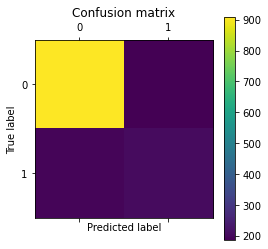

In [22]:
predictions = tree.predict(test_d)
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [23]:
print(metrics.classification_report(test_lab, predictions))

              precision    recall  f1-score   support

          No       0.82      0.83      0.83      1093
         Yes       0.53      0.51      0.52       401

    accuracy                           0.75      1494
   macro avg       0.68      0.67      0.67      1494
weighted avg       0.74      0.75      0.74      1494



__Performance__

The overall accuracy(regardless of classes) is 73%, similar to the results of KNN classifier. There is a significant improvement in recall in "Yes", nearly half of churn in correctly identifie this time. However, the precision of "Yes" is lower than those of knn-classifier: only 50% customer actually ended their contract with the company (churn) out of all predicted churn users. 

[Introduction](#another_cell)|
[Data preprocessing--Overview](#data_pre_over)|
[EDA visualisation section 1](#eda1)|
[Data cleaning](#data_cleaning)|
[Processing independent and dependent variables](#xandy)|
[EDA visualisation section 2](#eda2)|
[splitting into training and testing set](#testandtrain)|
[Classification1--KNN](#knn)|
[Classification2--KNN](#dt)|
[Classification3--KNN](#rf)|
[Classification4--KNN](#svm)|
[Comparison between models](#compare)|
[Conclusion](#conclude)|
[Bibliography](#bib)|

<a id='rf'></a>
#### Random Forest Classifiers

Random Forest Classifiers link multiple decision tree classifiers. 

A parameter,`n_estimators`, is needed this time, which is the number of trees in the forest.

In [24]:
# parameter tuning for random forest
#randf_n = [10,30,60,100,200,500,1000]

#from datetime import datetime

# for i in randf_n:
#     forest=RandomForestClassifier(n_estimators=i)  # creates the random forest classifier, setting it to check the selected neighbouring points
#     start = datetime.now()
#     forest.fit(train_d, train_lab)  # executes the classifier on the training dataset
#     end = datetime.now()
#     time_taken = end - start
#     print('Time: ',time_taken)
#     print(forest.score(test_d, test_lab))
    

In [25]:
forest=RandomForestClassifier(n_estimators=60)  # creates the random forest classifier, setting it to check the selected neighbouring points
forest.fit(train_d, train_lab)  # executes the classifier on the training dataset
print(forest.score(test_d, test_lab))

0.7791164658634538


As the value of `n_estimators` (number of trees) increases, the classification process will run longer. To ensure the notebook runs quickly, the time each process runs takes on my machine is recorded below:

|Number of trees (n_estimators)|Time taken to run the classifier|Accuracy|
|:--:|:--:|:--:|
|10|0.3s|0.7557|
|30|0.3s|0.7671|
|60|0.6s|0.7711|
|100|0.9s|0.7697|
|200|2s|0.7738|
|500|5s|0.7724|
|1000|10s|0.7738|

In case you wish to run the process yourself, comment every line in the previous code cell and uncomment the cell above it. 


Text(0, 0.5, 'accuracy')

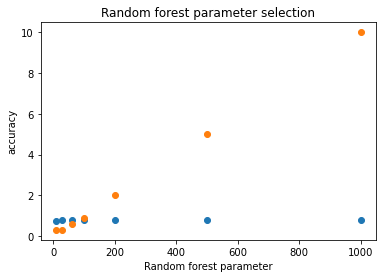

In [26]:
# results may be different across different runs
rf_acc = [0.7557,0.7671,0.7711,0.7697,0.7738,0.7724,0.7738]
rf_n = [10,30,60,100,200,500,1000]
rf_time= [0.3,0.3,0.6,0.9,2,5,10]
plt.scatter(rf_n, rf_acc)
plt.scatter(rf_n, rf_time)
plt.title("Random forest parameter selection")
plt.xlabel("Random forest parameter")
plt.ylabel("accuracy")

The parameter was chosen to be 60 as it maximises the accuracy without slowing down the process too much. 

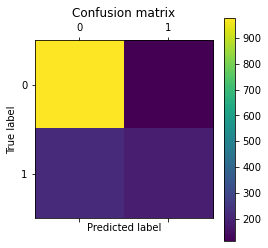

In [27]:
predictions = forest.predict(test_d)
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
print(metrics.classification_report(test_lab, predictions))

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1093
         Yes       0.62      0.46      0.53       401

    accuracy                           0.78      1494
   macro avg       0.72      0.68      0.69      1494
weighted avg       0.77      0.78      0.77      1494



__Performance__

The overall accuracy(regardless of classes) is 78%, similar to the accuracites of the above two classifiers. The recall in "Yes" is slightly smaller than that of decision trees and the precision of "Yes" is higher than that of  decision trees but lower than KNN. 


Between precision and recall, the company needs recall value to be higher as they can afford to better their service on both kinds of customers("Yes" and "No" in the churn column), than to lose the customer (that have not be identified).



[Introduction](#another_cell)|
[Data preprocessing--Overview](#data_pre_over)|
[EDA visualisation section 1](#eda1)|
[Data cleaning](#data_cleaning)|
[Processing independent and dependent variables](#xandy)|
[EDA visualisation section 2](#eda2)|
[splitting into training and testing set](#testandtrain)|
[Classification1--KNN](#knn)|
[Classification2--KNN](#dt)|
[Classification3--KNN](#rf)|
[Classification4--KNN](#svm)|
[Comparison between models](#compare)|
[Conclusion](#conclude)|
[Bibliography](#bib)|

<a id='svm'></a>
#### SVM

Support vector machine is another commonly-used supervised learning classification technique. It groups different clusters of data points by drawing and looking for the best hyperplane between them and maximise the distance between the line and nearest data points. 

In 2D, the hyperplane is just a line. But in mre dimensions, the feature space needs to be transformed into smaller dimensions. Kernel functions are often used to reduce computational complexity in the transformation. 

Four types of kernel functions are provided in Python Sklearn package:
- linear
- poly
- rbf (Radial Basis Function)
- sigmoid

RBF is the most used kernel function as it is stationary, isotropic and smooth (Sycorax, StackOverflow). Unlike a linear kernel function, the degree of feature space can be large, so that the data are more likely to be linearly independent (separable) in a high-dimensional space. Thus RBF is used in this analysis (it is the default kernel function in `svm.SVC()`). 

RBF has two parameters: C and gamma (Pedregosa et al., 2011). 
- A low C smoothes the decision surface whereas a high C tries to classify all training data correctly (resulting in a boundary that may be close to the data points). 
- A low gamma indicates that one training data point has a low influence and vice versa.


In [29]:
from sklearn import svm
from sklearn.metrics import precision_recall_fscore_support as score


# This cell takes a long time to run as it goes through every combination of parameters 
# fits, predict and give scores again and again
Cs = [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]
gammas = [1e-2, 1e-3, 1e-4, 1e-5]
accs=[]
recalls=[]

for i in gammas:
    for j in Cs:
        SVC_model = svm.SVC(gamma=i, C=j)
        SVC_model.fit(train_d, train_lab)
        predictions = SVC_model.predict(test_d)
        _,recall,_,_=score(test_lab, predictions,average='macro')
        recalls.append(recall)
        accs.append(SVC_model.score(test_d, test_lab))

/opt/conda/envs/sds2020/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/sds2020/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/sds2020/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/sds2020/lib/

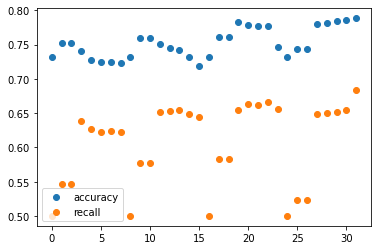

In [30]:
import numpy as np
plt.scatter(np.arange(len(accs)), accs, label = "accuracy")
plt.scatter(np.arange(len(recalls)), recalls, label = "recall")
plt.legend()

To avoid slowing down the notebook, the results are shown below. 




As discussed above, only accuracy and recall are taken into account. 
Each point on the scatter plot above correponds to the accuracy or recall value of one combinations of C and gamma. The maximal recall value appears when $C = 50$ , $gamma = 1e-4$. 

Note: When executing the first svm code cell, you may see some UndefinedMetricWarnings. Please ignore them as the only output to care is recall value. 

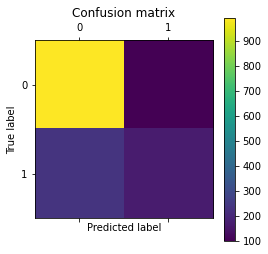

In [31]:
SVC_model = svm.SVC(gamma=1e-4, C=50)
SVC_model.fit(train_d, train_lab)
predictions = SVC_model.predict(test_d)
_,recall,_,_=score(test_lab, predictions,average='macro')


confusion_matrix = metrics.confusion_matrix(test_lab, predictions)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [32]:
print(metrics.classification_report(test_lab, predictions))

              precision    recall  f1-score   support

          No       0.81      0.91      0.86      1093
         Yes       0.63      0.42      0.50       401

    accuracy                           0.78      1494
   macro avg       0.72      0.66      0.68      1494
weighted avg       0.76      0.78      0.76      1494



__Performance__

The accuracy is similar to the above techniques but the recall of "yes" is similar to the decision tree's results, which is amongst the highest values of results so far. 


[Introduction](#another_cell)|
[Data preprocessing--Overview](#data_pre_over)|
[EDA visualisation section 1](#eda1)|
[Data cleaning](#data_cleaning)|
[Processing independent and dependent variables](#xandy)|
[EDA visualisation section 2](#eda2)|
[splitting into training and testing set](#testandtrain)|
[Classification1--KNN](#knn)|
[Classification2--KNN](#dt)|
[Classification3--KNN](#rf)|
[Classification4--KNN](#svm)|
[Comparison between models](#compare)|
[Conclusion](#conclude)|
[Bibliography](#bib)|

<a id='compare'></a>
#### Comparison


|Classification Technique|Accuracy|Recall of "Yes"|
|:--:|:--:|:--:|
|K-Nearest Neighbours|0.76|0.24|
|Decision Tree|0.73|0.51|
|Random Forest|0.78|0.47|
|Support Vector Machine|0.76|0.51|

<a id='conclude'></a>
### Conclusion

In this analysis, various prediction models are applied and their performance are compared. Among K-Nearest Neighbours, Decision Tree, Random Forest and Support Vector Machine, Decision Tree and SVM should be used as the primary classification and prediction techiqnue. This is because the accuracy of different classification techniques are roughly the same, but the recall value of correctly predicting the customer churn needs to be considered with the greatest attention. Telecommunication industry suffered from high churn rate and associated loss. With a relatively high recall value, more customer churn could be predicted beforehand and managed. 

Although SVM achieves the highest accuracy and recall combination, existing method only reach 50% of correct prediction, still leaving 50% churn customer unrecognised. More techniques should be applied and compared to reduced business loss and keep churn rate at an acceptable and profitable level. 

Some other measures to reduce churn rate include conducting a regression analysis to the same dataset and identify the top factors that affect the customer churn. This could be a follow-up analysis: after identifying the users with intentions to leave the provider, the company could provide or improve the services which could keep them. 

Note: The results of classifications are different across each runs, so the previously-generated plots and data could be different from what you see now. 

<a id='bib'></a>
### Bibliography

[1] 
D. V. Poel and B. Larivi, "Customer attrition analysis for financial services using proportional hazard models", European Journal of Operational Research, vol. 157, no. 1, pp. 196-217, 2004.
towards expansion of the subscriber base

[2]
A. Berson, S. Smith, K. Thearling. Building data mining applications for CRM, McGraw-Hill, New York, NY (2000)

[3]
Sycorax (https://stats.stackexchange.com/users/22311/sycorax), Why is RBF kernel used in SVM?, URL (version: 2016-06-29): https://stats.stackexchange.com/q/220887

[4]
Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

The source of data used in this analysis can be found [here](https://www.kaggle.com/radmirzosimov/telecom-users-dataset). 

